<a href="https://colab.research.google.com/github/xbadiam/Marketing_Campaign/blob/main/notebooks/MarketingCampaign_data_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Campaña de marketing
Aumentar las ganancias de una campaña de marketing

## 1. Introducción

### 1.1. Contexto

Un modelo de respuesta puede aumentar significativamente la eficiencia de una campaña de marketing, ya sea incrementando las respuestas o reduciendo los gastos. El objetivo es predecir quién responderá a una oferta de un producto o servicio.

### 1.2. Variables del dataset

* **Education**: Nivel de estudios del cliente.
* **Marital**: Estado civil del cliente.
* **Kidhome**: Número de niños pequeños en el hogar del cliente.
* **Teenhome**: Número de adolescentes en el hogar del cliente.
* **Income**: Ingreso familiar anual del cliente.
* **DtCustomer**: Fecha de inscripción del cliente en la empresa.
* **Recency**: Número de días transcurridos desde la última compra.
* **MntFishProducts**: Cantidad gastada en productos de pescado en los 2 últimos años.
* **MntMeatProducts**: Cantidad gastada en productos de pescado en los dos últimos años.
* **MntFruits**: Cantidad gastada en productos de fruta en los dos últimos años.
* **MntSweetProducts**: Cantidad gastada en productos dulces en los dos últimos años.
* **Mntwines**: Cantidad gastada en productos de vino en los últimos 2 años.
* **MntGoldProds**: Gasto en productos de oro en los últimos 2 años.
* **NumDealsPurchases**: Número de compras realizadas con descuento.
* **NumCatalogPurchases**: Número de compras realizadas a través del catálogo.
* **NumStorePurchases**: Número de compras realizadas directamente en tiendas.
* **NumWebPurchases**: Número de compras realizadas a través del sitio web de la empresa.
* **NumWebVisitsMonth** Número de visitas al sitio web de la empresa durante el último mes.
* **AcceptedCmp1**: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario.
* **AcceptedCmp2**: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario.
* **AcceptedCmp3**: - 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario.
* **AcceptedCmp4**: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario.
* **AcceptedCmp5**: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario.
* **Complain**: 1 si la cliente se quejó en los últimos 2 años.
* **Z_CostContact**: Costo de contactar a un cliente.
* **Z_Revenue**: Ingresos tras la campaña de aceptación del cliente.
* **Response (target)**: Respuesta del cliente. 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario.



## 2. Cargar datos

In [203]:
!rm -rf /content/Marketing_Campaign

! git clone https://github.com/xbadiam/Marketing_Campaign.git

Cloning into 'Marketing_Campaign'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 38 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 1.10 MiB | 12.25 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [204]:
# Data processing
# ==============================================================================
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Modelado
# ==============================================================================
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# graphic
# ==============================================================================
import plotly.express as px

In [205]:
data = pd.read_csv('/content/Marketing_Campaign/inputs/marketing_campaign.csv', sep=";")
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [206]:
data.shape

(2240, 29)

Un primer análisis de los datos sin procesar nos permite empezar a pensar en variables útiles que podríamos crear para comprender mejor nuestro conjunto de datos y revelar información valiosa.

Crearemos varias variables:

* Age: Variable de Edad (en sustitución de la variable Año_nacimiento)
* Spending: Variable Gasto (la suma del importe gastado en las 6 categorías de productos).
* La variable Marital_Situation para agrupar los diferentes estados civiles en solo dos categorías generales: En pareja vs. Solo/a
* Variable Has_child: Una variable binaria que indica que el cliente tiene uno o más hijos.
* Variable que informa si los clientes se encuentran en pareja o no
* Variable Educationnal_years: El número total de años de educación que la persona ha cursado según su titulación-

Eliminaremos las variables no utilizadas para este análisis.

## 3. Feature Engineering

In [207]:
# Variable que muestra la edad de los clientes
# ==============================================================================
data["Age"] = 2025 - data["Year_Birth"]

In [208]:
# Variable que muestra los gastos
# ==============================================================================
data['Spending'] = (data['MntWines'] +
                    data['MntFruits'] +
                    data['MntMeatProducts'] +
                    data['MntFishProducts'] +
                    data['MntSweetProducts'] +
                    data['MntGoldProds'])

In [209]:
# Variable que indica si tienen o no hijos los clientes
# ==============================================================================
data['Has_child'] = (data['Kidhome'] + data['Teenhome'] > 0).astype(int)

In [210]:
# Variable que informa si los clientes se encuentran en pareja o no
# ==============================================================================
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Widow":"Alone", "Divorced":"Alone", "Single":"Alone"})

In [211]:
# Variable que indica el total de hijos en casa
# ==============================================================================
data["Children"] = data["Kidhome"] + data["Teenhome"]

In [212]:
# Eliminacion de variables redundantes
# ==============================================================================
to_drop = ["Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

## 4. Análisis exploratorio


### 4.1. Tipo de cada columna

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Dt_Customer          2240 non-null   object 
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

Detectamos las siguientes observaciones en la estructura del dataset:

* La variable **Dt_Costumer** presenta un tipo de dato Object y la cambiaremos al tipo DateTime

* La variable 'Income' detectamos datos faltantes

* Las variables categoricas 'Education' y 'Marital_status' deberan ser convertidas a variables de tipo numéricas.

In [214]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

### 4.2. Número de observaciones y valores ausentes

In [215]:
print('Tamaño del dataset: ', data.shape)

Tamaño del dataset:  (2240, 30)


In [216]:
# Número de datos ausentes por variable
# ==============================================================================
data.isna().sum().sort_values()

,0
Education,0
Marital_Status,0
Kidhome,0
Teenhome,0
Recency,0
Dt_Customer,0
MntWines,0
MntFruits,0
MntGoldProds,0
MntMeatProducts,0


Como se ha comentado en el apartado anterior, la variable **Income* contiene valores ausente (un total de 24). En el apartado imputación de valores ausentes seguiremos una estrategiaa de imputación cuando el set de datos está incompleto.

### 4.3. Variables numéricas

In [217]:
# Variables numéricas
# ==============================================================================
data.select_dtypes(include=['float64', 'int']).describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spending,Has_child,Children
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,56.194196,605.798214,0.715179,0.950446
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,602.249288,0.451430,0.751803
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,68.750000,0.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,396.000000,1.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,1045.500000,1.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,132.000000,2525.000000,1.000000,3.000000


#### 4.3.2. Distribución de los datos numéricos

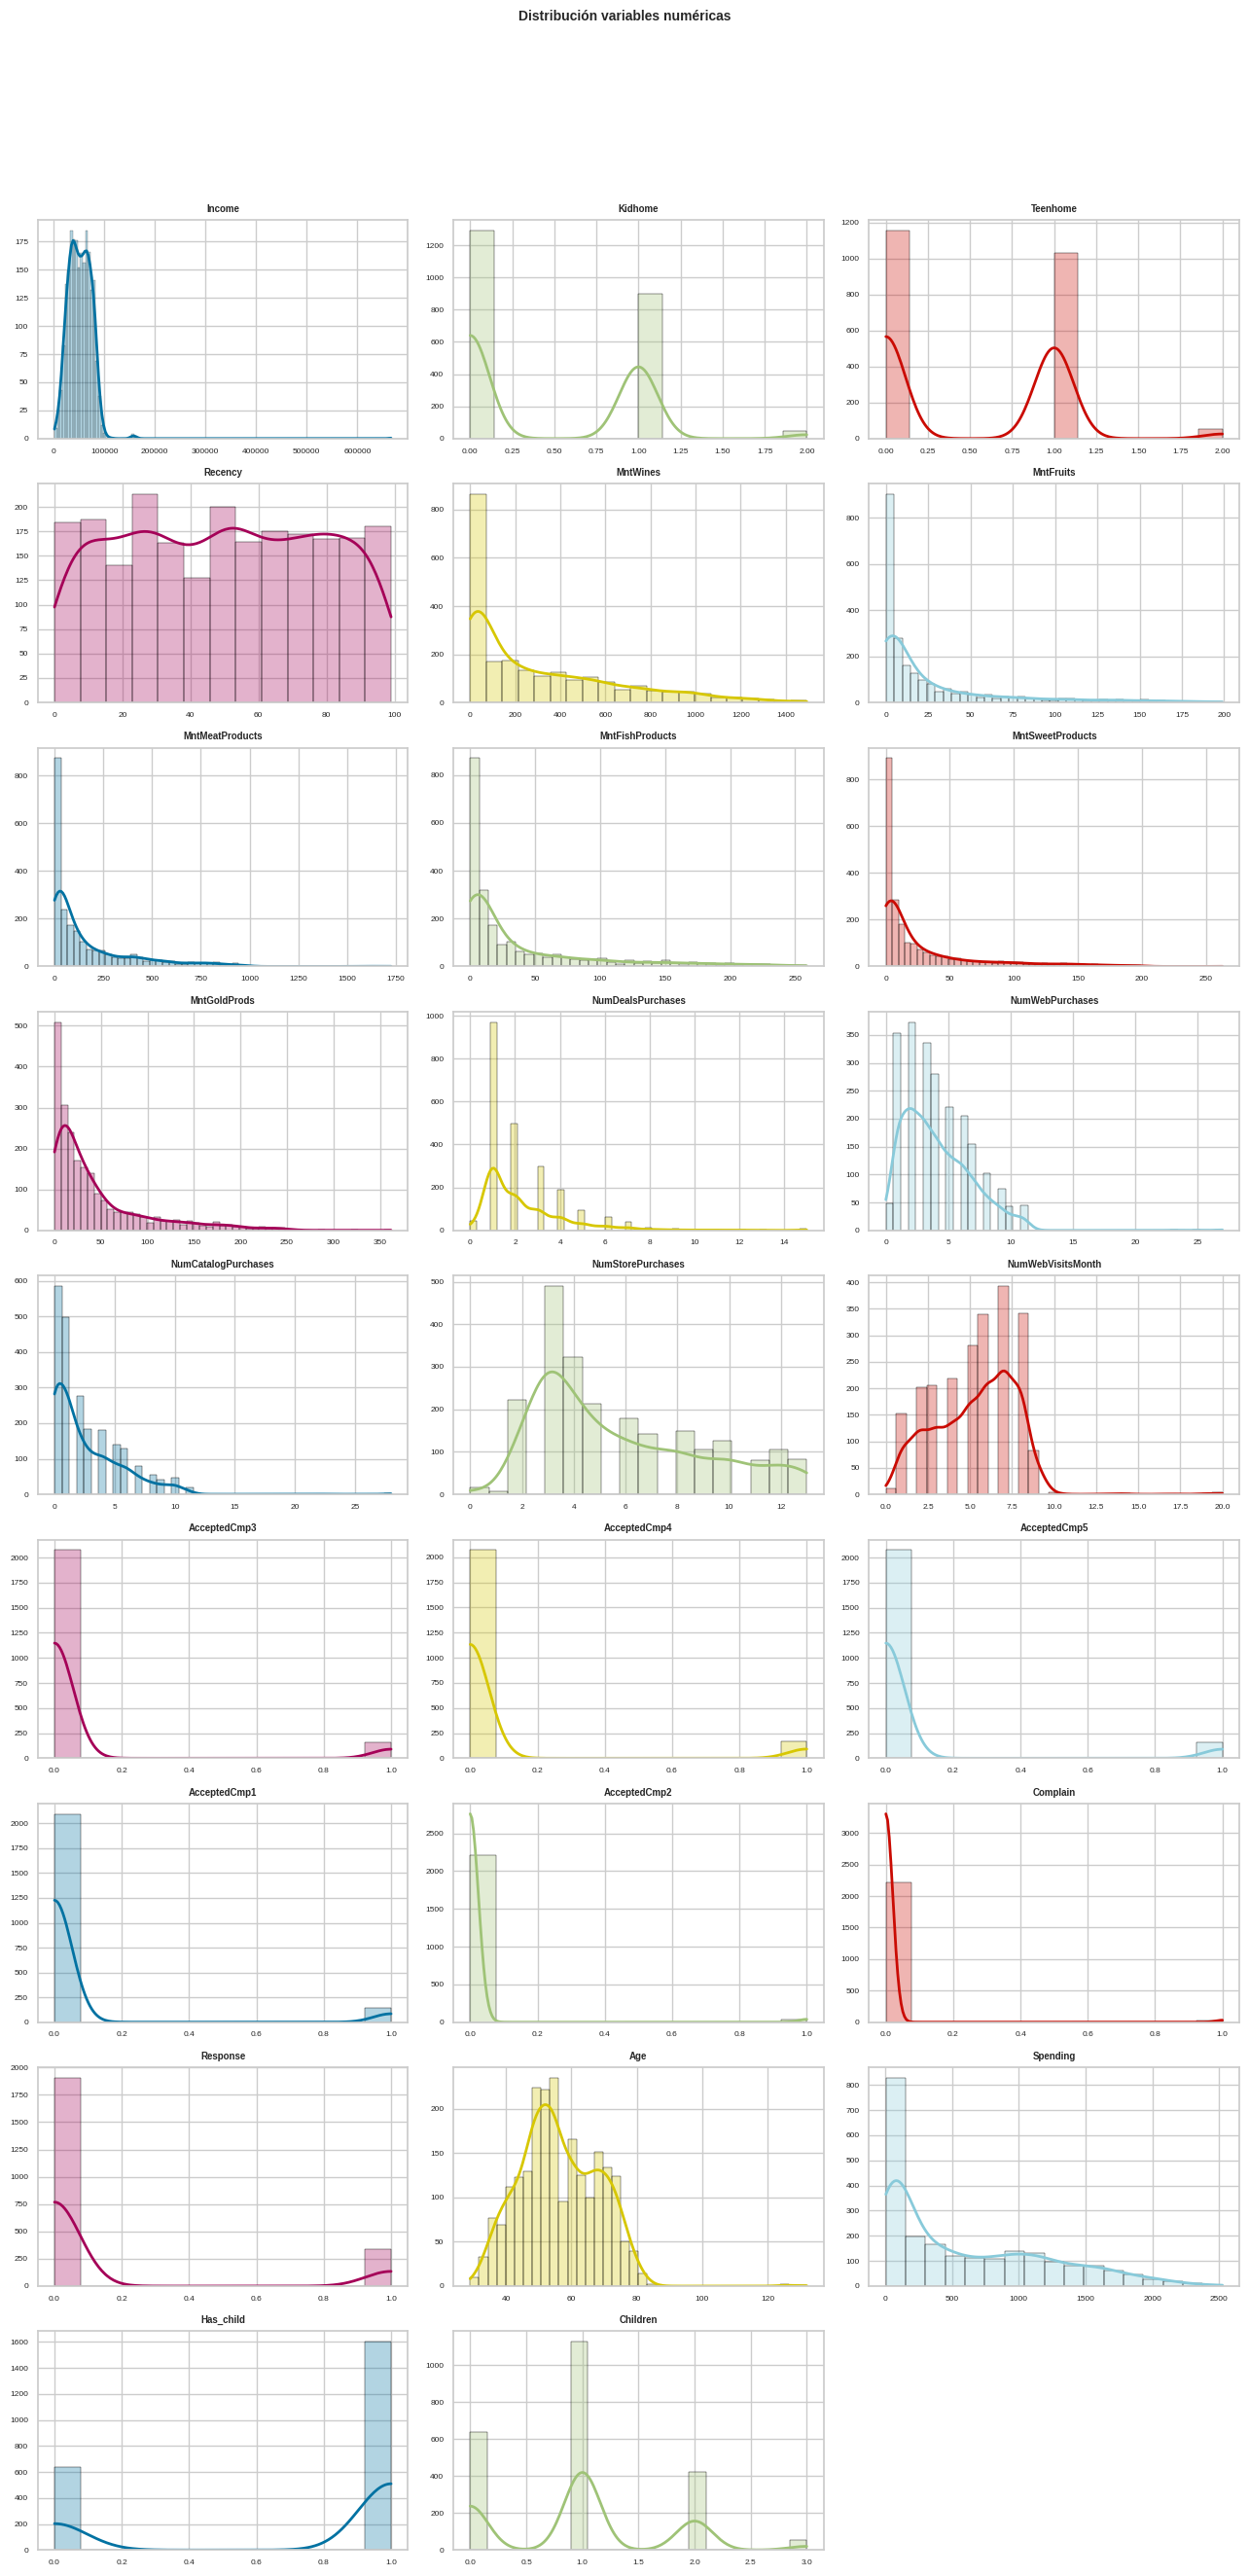

In [218]:
import math

# Variables numéricas
# ==============================================================================
# Drop 'ID' and 'Year_Birth' from the list of numeric columns
#columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns.drop(['ID', 'Year_Birth'])
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns

nColums_numeric = len(columnas_numeric)
nRows_numeric = math.ceil(nColums_numeric / 3)

# Adjust the figure size to accommodate all plots
fig, axes = plt.subplots(nrows=nRows_numeric, ncols=3, figsize=(13, nRows_numeric * 3))
axes = axes.flat

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = data,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i % len(plt.rcParams['axes.prop_cycle'])]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )

    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Oculta ejes sobrantes si hay más subgráficos que columnas
for ax in axes[len(columnas_numeric):]:
    ax.set_visible(False)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");


La variable **Z_CostContact** y **Z_Revenue** presentan una distribución uniforme y podemos deducir que son variables redundantes. Existen variables que presentan una distribución discreta que deberemos valorar transformarlas en variables de tipo :cualitativa.

Las variables **KidHome** y **TeenHome** aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

#### 4.3.3. Datos Outliers

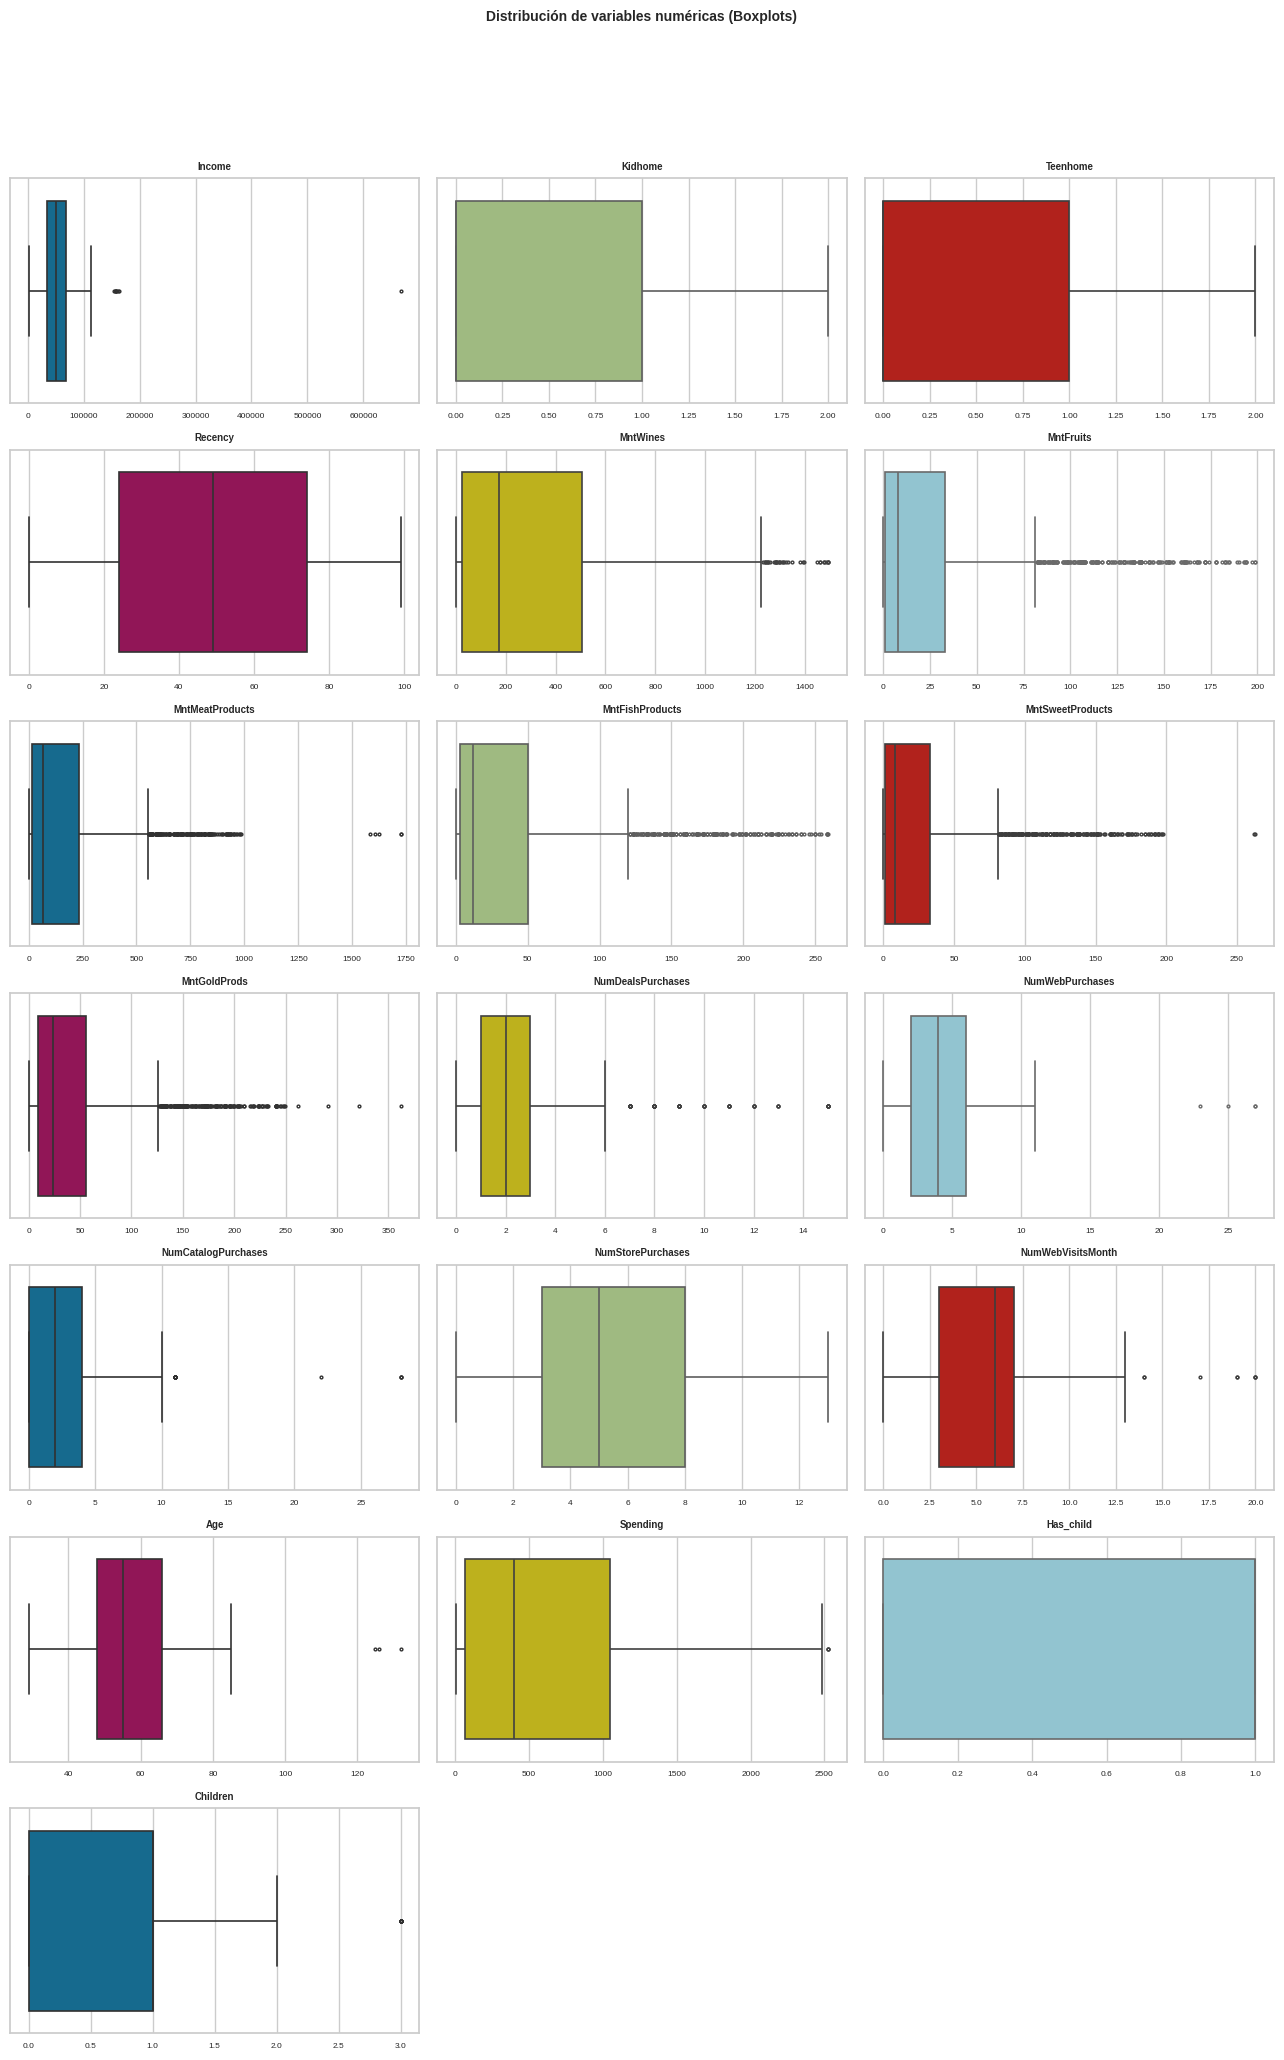

In [219]:
# Ajustar el tamaño de la figura para acomodar todos los boxplots

columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns.drop(['AcceptedCmp1',
                                                                                'AcceptedCmp2',
                                                                                'AcceptedCmp3',
                                                                                'AcceptedCmp4',
                                                                                'AcceptedCmp5',
                                                                                'Complain',
                                                                                'Response'])

nColums_numeric = len(columnas_numeric)
nRows_numeric = math.ceil(nColums_numeric / 3)


fig, axes = plt.subplots(nrows=nRows_numeric, ncols=3, figsize=(13, nRows_numeric * 3))
axes = axes.flat

for i, colum in enumerate(columnas_numeric):
    sns.boxplot(
        data   = data,
        x      = colum,
        color  = (list(plt.rcParams['axes.prop_cycle'])*2)[i % len(plt.rcParams['axes.prop_cycle'])]["color"],
        ax     = axes[i],
        fliersize = 2,    # tamaño de los puntos atípicos
        linewidth = 1.2
    )

    axes[i].set_title(colum, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")  # sin etiqueta de eje X
    axes[i].set_ylabel("")  # sin etiqueta de eje Y

# Ocultar ejes sobrantes si hay más subgráficos que columnas
for ax in axes[len(columnas_numeric):]:
    ax.set_visible(False)

# Ajustes de formato general
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de variables numéricas (Boxplots)', fontsize=10, fontweight="bold")
plt.show()

La variable Age presenta valores por encima de los 100 años. Vamos a eliminar aquellos registros que presentan una edad mayor a 90 años.

También podemos observar como la variable presenta un ingreso familiar anual del cliente muy por encima de 600000. Este es un caso atípico y podemos eliminar el registro.

In [220]:
data  = data[data['Age'] <= 90]
data = data[data['Income'] <= 600000]

#### 4.3.4 Correlación variables numéricas

In [221]:
# Correlación entre columnas numéricas
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
602,Spending,MntWines,0.892996,0.892996
127,MntWines,Spending,0.892996,0.892996
179,MntMeatProducts,Spending,0.845543,0.845543
604,Spending,MntMeatProducts,0.845543,0.845543
674,Children,Has_child,0.799802,0.799802
649,Has_child,Children,0.799802,0.799802
23,Income,Spending,0.792740,0.792740
598,Spending,Income,0.792740,0.792740
335,NumCatalogPurchases,Spending,0.780250,0.780250
610,Spending,NumCatalogPurchases,0.780250,0.780250


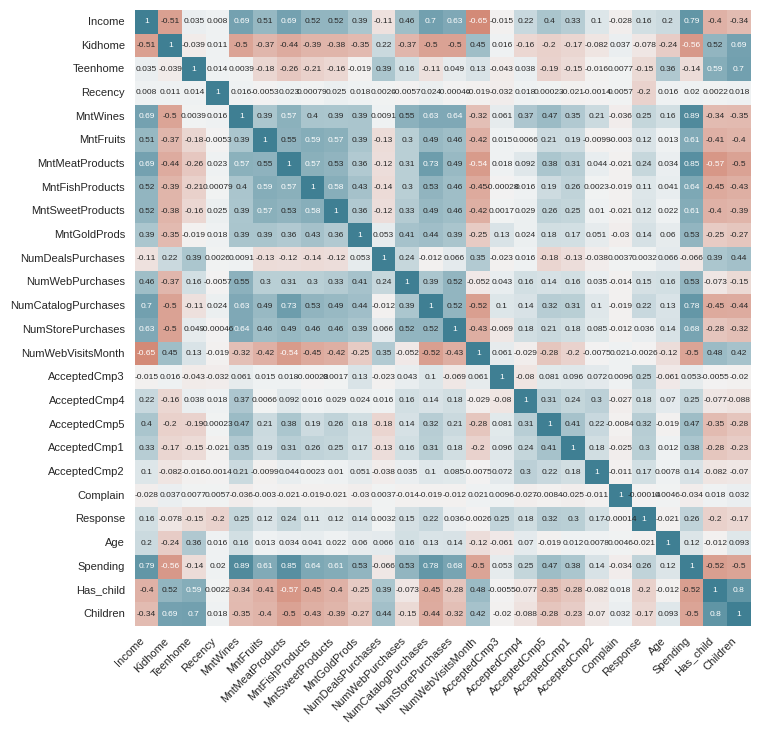

In [222]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)


### 4.4. Variables cualitativas

In [223]:
data.select_dtypes(include=['object']).describe()

,Education,Marital_Status,Living_With
count,2212,2212,2212
unique,5,8,4
top,Graduation,Married,Partner
freq,1115,857,1428


In [224]:
# Valores observados del número de niños pequeños en el hogar del cliente.
# ==============================================================================
data.Kidhome.value_counts()


,count
Kidhome,
0,1281
1,885
2,46


In [225]:
# Se convierte la variable KidHome tipo string
# ==============================================================================
data.Kidhome = data.Kidhome.astype("str")

In [226]:
# Valores observados del número de adolescentes en el hogar del cliente.
# ==============================================================================
data.Teenhome.value_counts()

,count
Teenhome,
0,1144
1,1017
2,51


In [227]:
# Se convierte la variable KidHome tipo string
# ==============================================================================
data.Teenhome = data.Teenhome.astype("str")

Las dos variables tomaran solo dos variables:

* KidHome: 0 sin niños y 1 con niños.
* TeenHome: 0 sin adolescentes, 1 con adolescentes.

Uniremos los valores del 1 y 2 ya que no aportan valor por separado.

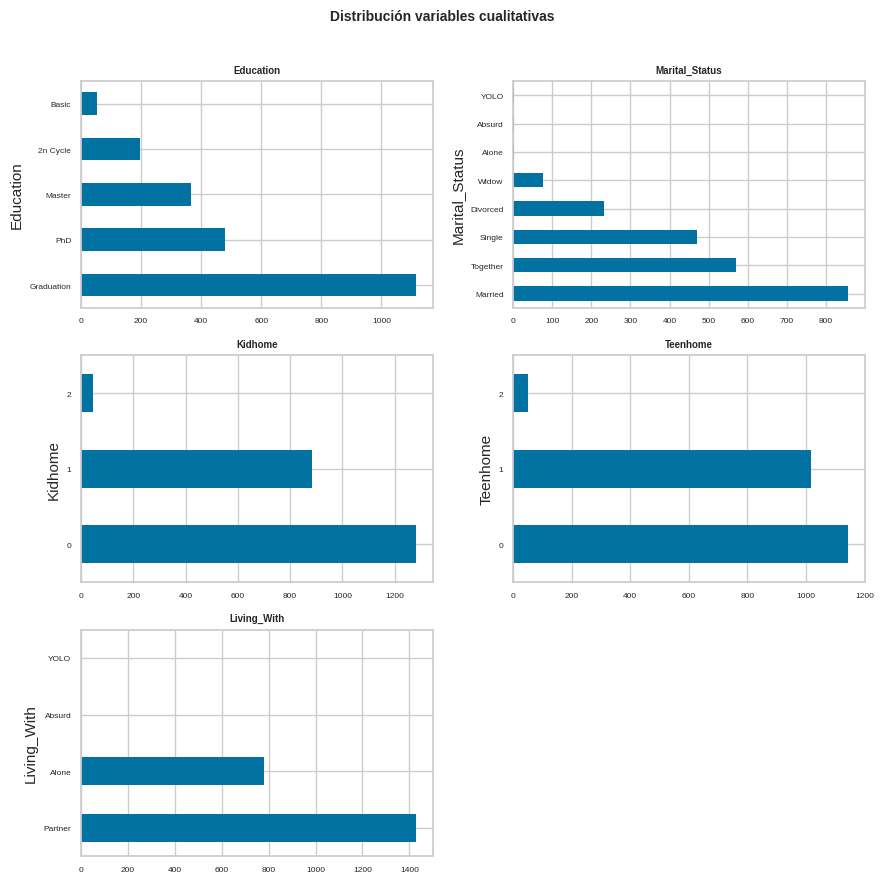

In [228]:
# Gráfico para cada variable cualitativa
# ==============================================================================

# Ajustar número de subplots en función del número de columnas
columnas_object = data.select_dtypes(include=['object']).columns
nColums_object = len(columnas_object)
nRows_object = math.ceil(nColums_object / 2) # Usar 2 columnas por fila para las cualitativas

fig, axes = plt.subplots(nrows=nRows_object, ncols=2, figsize=(9, nRows_object * 3))
axes = axes.flat

for i, colum in enumerate(columnas_object):
    data[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Oculta ejes sobrantes si hay más subgráficos que columnas
for ax in axes[len(columnas_object):]:
    ax.set_visible(False)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. En estos casos, suele ser conveniente:

* Eliminar las observaciones del grupo minoritario si es una variable multiclase.

* Eliminar la variable si solo tiene dos niveles.

* Agrupar los niveles minoritarios en un único grupo.

* Asegurar que, en la creación de las particiones, todos los grupos estén representados en cada una de ellas.

Para este caso, hay que tener precaución con la variable KidHome y TeenHome. Se unifican los niveles de 1, 2 en un nuevo nivel llamado "WithKid" y "WithTeen".



In [229]:
# Se modifica la variable Kidhome
# ==============================================================================
dic_replace_kid = {
    '0': "Without_Kid",
    '1': "With_Kid",
    '2': "With_Kid"
    }

data['Kidhome'] = (data['Kidhome'].map(dic_replace_kid).fillna(data['Kidhome']))

data.Kidhome.value_counts().sort_index()


,count
Kidhome,
With_Kid,931
Without_Kid,1281


In [230]:
# Se modifica la variable Teenhome
# ==============================================================================

dic_replace_Teen = {
    '0': "Without_Teen",
    '1': "With_Teen",
    '2': "With_Teen"
    }

data['Teenhome'] = (data['Teenhome'].map(dic_replace_Teen).fillna(data['Teenhome']))

data.Teenhome.value_counts().sort_index()



,count
Teenhome,
With_Teen,1068
Without_Teen,1144


In [231]:
# Se modifica la variable Teenhome
# ==============================================================================
data.Marital_Status.value_counts().sort_index()

,count
Marital_Status,
Absurd,2
Alone,3
Divorced,231
Married,857
Single,470
Together,571
Widow,76
YOLO,2


Filtramos aquellas filas que presentan un 'Marital_Status' igual a Absurd ya que no se sabe a que categoria pertenecen.

In [232]:
data = data[data['Marital_Status'] != 'Absurd']

En la variables 'Marital_Status' se agregarán las categorias 'YOLO' y 'Alone' a la categoria 'Single'

In [233]:
data.replace({'YOLO':'Single', 'Alone': 'Single'}, inplace = True)
data.Marital_Status.value_counts().sort_index()

,count
Marital_Status,
Divorced,231
Married,857
Single,475
Together,571
Widow,76


In [234]:
# Se modifica la variable Education
# ==============================================================================
data.Education.value_counts().sort_index()

,count
Education,
2n Cycle,198
Basic,54
Graduation,1114
Master,364
PhD,480


Agrupamos la variable en tres grupos (Undergraduate, Graduate y Postgraduate) con el fin de facilitar la comprensión de los estudios finalizados por parte de los clientes.

In [235]:
# segmentacion de la variable en tres grupos
data["Education"]= data["Education"].replace({"Basic":"Undergraduate",
                                              "2n Cycle":"Undergraduate",
                                              "Graduation":"Graduate",
                                              "Master":"Postgraduate",
                                              "PhD":"Postgraduate"})

## 5. Test de hipótesis estadísticas

La visualización de datos nos permitió comprender mejor nuestro conjunto de datos y nos ayudó a formular preguntas sobre ellos. Las pruebas de hipótesis estadísticas nos permiten determinar la confianza o probabilidad de las respuestas. Cada vez que probemos una hipótesis, presentaremos nuestro análisis siguiendo este esquema:

## 6. Guardad conjunto de datos resultante

In [236]:
data.shape

(2210, 30)

In [241]:
data.to_csv('/content/Marketing_Campaign/outputs/output.csv', encoding='utf-8-sig', index=False)
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [238]:
!cp '/content/Marketing_Campaign/outputs/output.csv' repositorio/output.csv

cp: cannot create regular file 'repositorio/output.csv': No such file or directory


In [239]:
!cd repositorio && git add output.csv && git commit -m "Añadido CSV" && git push

/bin/bash: line 1: cd: repositorio: No such file or directory
